In [62]:
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt

### 1. t-test для двух выборок

В прошлой лекции по одной выборке мы попытались ответить на вопрос о ГС. Такие тесты называют **одновыборочными**. Но чаще, по крайней мере в бизнес индустрии, проводят тестирование на двух выборках. Тесты для сравнения двух выборок называются **двухвыборочными**.

**Задача**:</br> 
Вы работаете в крупной фармацевтической компании, которая разрабатывает медицинские препараты. Ученные вашей компании разработали препарат, который помогает бороться с бессоницей. Они утверждают, что препарат действует моментально - нужно принять препарат, и в эту же ночь вероятность отоспаться увеличивается.

Ученные отобрали 200 человек, страдающих бессоницей. Рандомно разделили их на контрольную и тестовую группу по 100 человек в каждой (иногда тестовую группу называют целевой или таргетной). Тестовая группа в течение недели принимала препарат, а контрольная группа нет. 

Необходимо проверить эффективен ли препарат.

В постановке задачи мы встретились с новыми определениями:</br>
**Контрольная группа** - группа людей, страдающих бессоницей, которую оставили без изменений (не принимали препарат)</br>
**Тестовая группа** - группа людей, страдающих бессоницей, к которым были применены измененения (принимали препарат)</br>
**Период проведения теста** - составляет 1 неделю

Определения, с которыми мы уже сталкивались:</br>
**Генеральная совокупность** - люди страдающие бессоницей. Из них были отобраны **рандомно** контрольная и тестовая группа. В контесксте этой задачи понятие ГС не важно.

Сформулируем нулевую и альтернативную гипотезу:</br>
**Нулевая гипотеза** - разницы между средними групп нет. Это также означает, что препарат не эффективен</br>
**Альтернативная гипотеза** - разница средними групп есть. Препарат влияет положительно или отрицательно на бессоницу</br>
Установим уровень значимости **alpha** = 0.05. Уровень значимости, вероятность совершить ошибку первого рода

Сгенерируем выборки для задачи. Одно значение в выборке, это сумма часов проведенных во сне за неделю на одного человека

In [63]:
np.random.seed(0)
test  = [np.random.randint(17,32) for i in range(100)]
control  = [np.random.randint(15,30) for i in range(100)]

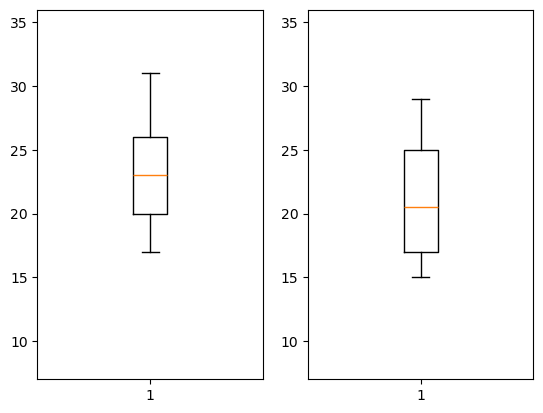

In [64]:
fig, axs = plt.subplots(nrows= 1, ncols = 2)

axs[0].boxplot(test)
axs[0].set_ylim(min(min(test)-5, min(control))-5, max(max(test)+5, max(control)+5))

axs[1].boxplot(control)
axs[1].set_ylim(min(min(test)-5, min(control))-5, max(max(test)+5, max(control)+5))

plt.show()

t-test для сравнения двух выборок работает также как для одной выборки: </br>

Шаг 1: Расчитываем оценку стандартную ошибку среднего по формуле: 
### $ESE = \frac{s_{control}}{\sqrt{n}} + \frac{s_{test}}{\sqrt{n}} $ <br/>

Заметьте, что в формуле учитывается стандартные отклонения обеих выборок

Шаг 2: Расчитываем t-статистику по формуле:

### $t = \frac{\bar{x}_{test} - \bar{x}_{control}}{ESE}$

Шаг 3: Расчитываем кол-во степеней свободы:

### $ df = n_1 + n_2 – 2$

In [65]:
sts.ttest_ind (test,control)

TtestResult(statistic=2.86643430473161, pvalue=0.0046001091187482255, df=198.0)

In [66]:
t_stat, p_value = sts.ttest_ind (test,control)

In [67]:
print(t_stat, p_value)

2.86643430473161 0.0046001091187482255


p-value получилось очень маленьким. p-value < alpha. t-статистика сильно отклонилась от нуля. Значит вероятность получить такую или более экстремальную т-статистику очень низкая, меньше 5%. Поэтому у нас есть все основания отклонить нулевую гипотезу и сказать что разница между группами есть.

Построим t-распределение для наглядности и нанесем на график получившуюся t-статистику

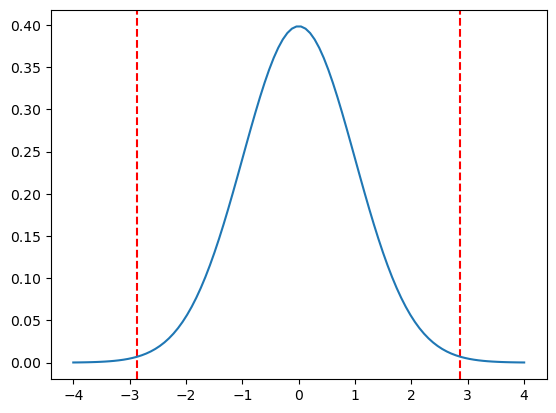

In [68]:
x = np.linspace(-4, 4, 100)
plt.axvline(t_stat, color='r', linestyle='--')
plt.axvline(-t_stat, color='r', linestyle='--')
plt.plot(x, sts.t.pdf(x, df=198), label='t-distribution (df=198)')
plt.show()

### 2. Условия применимости t-теста
1. Нормальность выборочных средних </br>
2. Независимость наблюдений в выборке

Про нормальность распределения выборочных средних мы говорили неоднократно. Это условие будет выполнятся, вспоминаем ЦПТ. Теперь давайте разберем что такое независимость наблюдений

**Независимость наблюдений** в выборке означает, что значения в выборке не зависят друг от друга. Одно значение в выборке не влияет на другое значение в той же или в другой выборке.

Пример зависимых значений:</br>
Допустим у нас есть набор чеков из продуктового магазина purchs = [500, 630, 700, ...]</br>
Чеки - это зависимые наблюдения, потому что один покупатель может совершить несколько покупок, а каждая последующая покупка покупателя зависит от того, что покупатель купил ранее. Если мы разобьем чеки на контрольную и тестовую выборки, то случиться так, что значение в одной выборке будет зависеть от значения в другой выборке (чеки одного покупателя будут присутствовать в обеих выборках).

**Метрики** - это показатели, с помощью которых что-то измеряют. Метрики показывает эффективность чего-то

Для того чтобы избавиться от зависимости наблюдений можно посчитать показатель (метрику) на покупателя. Например, для каждого покупателя посчитать общую сумма покупок за выбранный период времени.

Примеры метрик, которые можно тестировать с помощью t-теста:
1. Сумма всех покупок за период, посчитанная на одного покупателя
2. Кол-во покупок за период, посчитанная на одного покупателя
3. Средний чек, посчитанный на одного покупателя
4. Суммарное время проведенное на сайте за период на одного посетителя сайта

Метрики не обязательно должны быть поюзерные (на покупателя). Главное чтобы наблюдения в распределении были **независимы**.

Для всех перечисленых распределений можно посчитать среднее. Поэтому t-test называют тестом для средних.

Также t-тест применим для конверсионных метрик, например:
1. Конверсия из просмотра ленты в просмотр страницы товара
2. Конверсия из просмотра страницы товара в добавление в корзину
3. Конверсия из корзины в оплату
4. Конверсия из просмотра страницы регистрации в регистрацию
5. Конверсия из получение email-рассылки, в прочтение письма и тд.

Про конверсионные метрики мы подробнее поговорим в следующем уроке.